          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

2023-03-07 23:14:44.909477: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-07 23:14:44.909602: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-07 23:14:45.001444: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-07 23:14:45.361931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


642/642 [==============================] - ETA: 0s - loss: 0.5469

2023-03-07 23:14:50.388417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


642/642 [==============================] - 6s 9ms/step - loss: 0.5469 - val_loss: 0.4887
Epoch 2/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4858 - val_loss: 0.4738
Epoch 3/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4704 - val_loss: 0.4596
Epoch 4/50
642/642 [==============================] - 6s 9ms/step - loss: 0.4612 - val_loss: 0.4582
Epoch 5/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4534 - val_loss: 0.4523
Epoch 6/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4526 - val_loss: 0.4525
Epoch 7/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4507 - val_loss: 0.4522
Epoch 8/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4453 - val_loss: 0.4461
Epoch 9/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4450 - val_loss: 0.4484
Epoch 10/50
642/642 [==============================] - 5s 8ms/step - loss: 0.4419 - val_loss: 0.4497
Epoch 11/5

2023-03-07 23:19:08.718361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 1s 2ms/step
[[6691  128]
 [1614  366]]


              precision    recall  f1-score   support

           0       0.81      0.98      0.88      6819
           1       0.74      0.18      0.30      1980

    accuracy                           0.80      8799
   macro avg       0.77      0.58      0.59      8799
weighted avg       0.79      0.80      0.75      8799



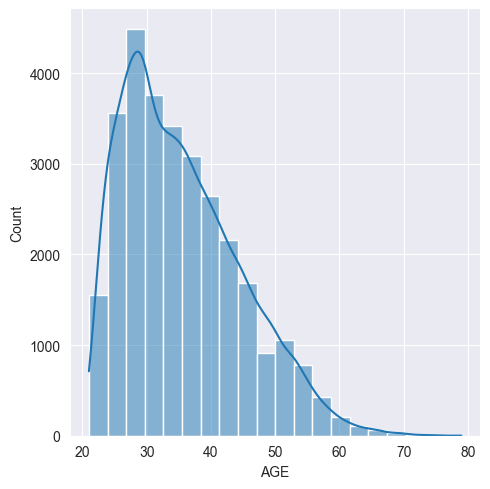

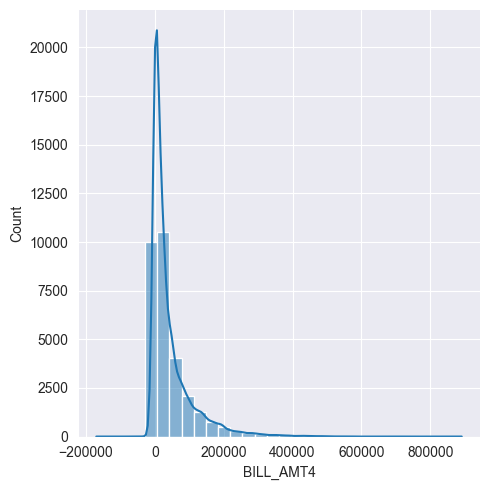

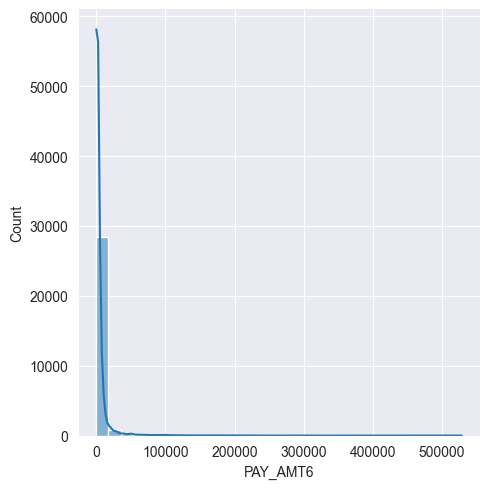

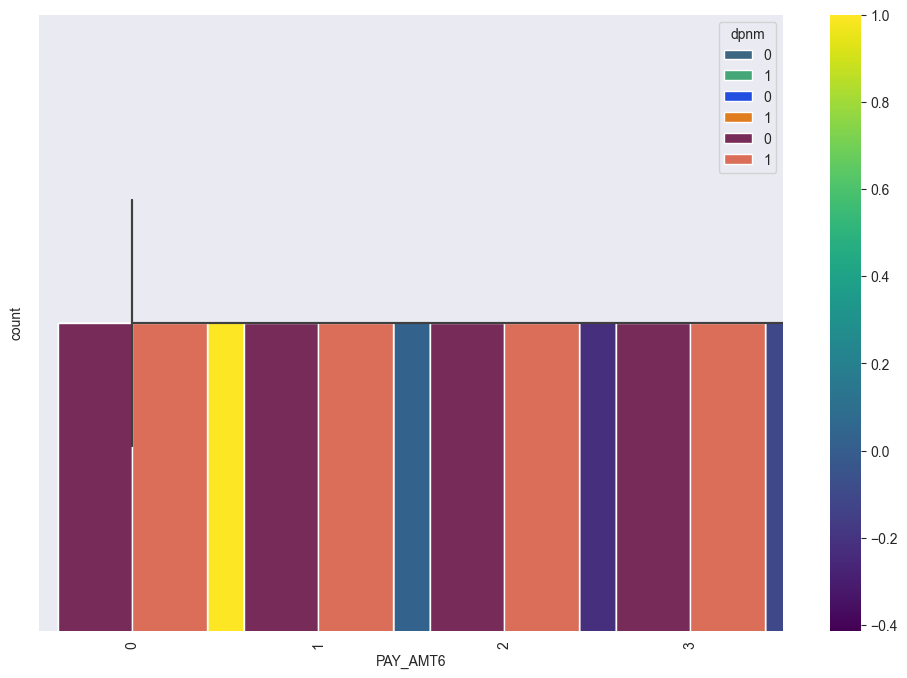

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

sns.set_style('darkgrid')

#import dataset
credit = pd.read_csv('../datasets/default of credit card clients.csv')

print(credit)

#exploratory data analysis
credit.head()

credit.info()

credit.describe()

#drop id as its not needed in analysis
credit = credit.drop('ID', axis = 1)

#check for duplicates and drop if there are any
credit.duplicated().sum()
credit = credit.drop_duplicates()

#check distribution for normalization (not normalized and will need to be scaled for accuracy)
sns.displot(credit['AGE'], bins = 20, kde = True)

sns.displot(credit['BILL_AMT4'], bins = 30, kde = True)

sns.displot(credit['PAY_AMT6'], bins = 30, kde = True)

#correlation heatmap to check for relationships between variables
plt.figure(figsize = (12,8))
sns.heatmap(credit.corr(), cmap = 'viridis')

#histograms for distribution between categorical variables
sns.countplot(x = 'SEX', data= credit, palette = 'viridis')

credit['SEX'].value_counts() #count printout

sns.countplot(x = 'SEX', data = credit, palette = 'viridis', hue = 'dpnm') #hue of default or not

credit['EDUCATION'].value_counts()

sns.countplot(x ='EDUCATION', data = credit, palette = 'bright')

sns.countplot(x = 'EDUCATION', data = credit, palette = 'bright', hue = 'dpnm')

credit['MARRIAGE'].value_counts()

sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket')

sns.countplot(x = 'MARRIAGE', data = credit, palette = 'rocket', hue = 'dpnm')

#OUTLIERS looking into through boxplots
sns.boxplot(x = 'LIMIT_BAL', data = credit)

sns.boxplot(x = 'PAY_AMT6', data = credit)

credit = credit[(credit['LIMIT_BAL'] <= 550000) & (credit['PAY_AMT6'] <= 50000)]

credit.info()

sns.boxplot(x = 'LIMIT_BAL', data = credit)

sns.boxplot(x = 'PAY_AMT6', data = credit)


#SCALING AND SPLITTING DATA
scaler = StandardScaler()
scaler.fit(credit.drop('dpnm', axis = 1))

scaled_data = scaler.transform(credit.drop('dpnm', axis = 1))

credit_feat = pd.DataFrame(scaled_data, columns = credit.columns[:-1])
credit_feat.head()

#TTS

X_train, X_test, y_train, y_test = train_test_split(scaled_data, credit['dpnm'], test_size = 0.30, random_state=42)


# NEURAL NETWORK MODEL

model = Sequential()
# input layer
model.add(Dense(50,  activation='relu'))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

#prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )




neural_predict = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, neural_predict))
print('\n')
print(classification_report(y_test, neural_predict))